In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

sns.set_style('whitegrid')

In [11]:
data = pd.read_csv('data/data.tsv', sep='\t')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sex                      32 non-null     object 
 1   group                    32 non-null     object 
 2   center time              32 non-null     float64
 3   sum corner time          32 non-null     float64
 4   min one corner time      32 non-null     float64
 5   max one corner time      32 non-null     float64
 6   average corner time      32 non-null     float64
 7   overall track length     32 non-null     float64
 8   center path              32 non-null     float64
 9   sum corner path          32 non-null     float64
 10  min one corner path      32 non-null     float64
 11  max one corner path      32 non-null     float64
 12  average corner path      32 non-null     float64
 13  overall velocity         32 non-null     float64
 14  center velocity          32 

In [13]:
data.sex = data.sex.apply(lambda x: int(x == 'male'))

In [14]:
data.group= data.group.apply(lambda x: int(x=='post-stress'))

In [15]:
data.describe()

,sex,group,center time,sum corner time,min one corner time,max one corner time,average corner time,overall track length,center path,sum corner path,...,average corner path,overall velocity,center velocity,max corner velocity,min corner velocity,average corner velocity,overall activity,center activity,min one corner activity,max one corner activity
count,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,0.375000,0.500000,36.821875,217.928125,18.55625,112.962500,54.484375,1525.415625,364.668750,557.796875,...,139.450000,4.903125,9.581250,4.337500,2.175000,3.129688,40.021875,65.912500,25.365625,44.734375
std,0.491869,0.508001,22.320130,69.724209,9.70653,55.603131,17.433808,915.486648,333.802652,193.546816,...,48.390028,2.945361,6.394374,1.659916,0.914048,1.193048,7.502332,12.449686,8.885966,7.379772
min,0.000000,0.000000,8.700000,84.700000,4.00000,31.400000,21.200000,176.800000,19.300000,157.500000,...,39.400000,0.600000,2.200000,1.900000,0.400000,1.200000,12.300000,41.800000,7.900000,33.100000
25%,0.000000,0.000000,20.450000,168.700000,12.37500,67.675000,42.150000,716.375000,109.675000,430.725000,...,107.675000,2.200000,3.450000,2.875000,1.675000,2.275000,38.350000,59.100000,17.925000,39.400000
50%,0.000000,0.500000,31.750000,237.000000,17.45000,114.750000,59.250000,1343.400000,193.250000,559.500000,...,139.900000,4.450000,8.500000,4.600000,2.000000,2.900000,41.250000,63.500000,26.000000,44.650000
75%,1.000000,1.000000,43.925000,281.400000,22.65000,138.425000,70.400000,2363.350000,600.475000,640.425000,...,160.100000,7.525000,13.875000,5.325000,2.600000,3.787500,43.925000,75.025000,32.025000,49.850000
max,1.000000,1.000000,104.000000,295.500000,42.00000,267.200000,73.900000,3125.400000,1209.800000,987.400000,...,246.900000,10.300000,24.000000,7.600000,4.500000,5.900000,51.500000,91.300000,42.300000,60.500000


In [16]:
data

,sex,group,center time,sum corner time,min one corner time,max one corner time,average corner time,overall track length,center path,sum corner path,...,average corner path,overall velocity,center velocity,max corner velocity,min corner velocity,average corner velocity,overall activity,center activity,min one corner activity,max one corner activity
0,0,0,32.3,280.5,22.8,125.7,70.10,547.0,90.8,456.2,...,114.1,1.7,2.8,2.1,1.3,1.50,37.7,56.2,30.9,40.8
1,0,0,47.5,260.7,21.5,112.1,65.20,725.4,151.5,573.8,...,143.5,2.4,3.2,2.4,1.9,2.10,43.0,65.1,34.1,49.3
2,0,0,40.1,289.1,36.3,114.8,72.30,644.4,109.6,534.8,...,133.7,2.0,2.7,1.9,1.8,1.80,39.0,49.8,33.9,43.5
3,0,0,43.6,265.3,18.9,118.8,66.30,581.7,111.2,470.5,...,117.6,1.9,2.5,2.0,1.6,1.80,38.8,53.2,32.1,48.2
4,0,0,31.2,286.0,22.4,140.3,71.50,710.3,99.5,610.7,...,152.7,2.2,3.2,2.5,1.8,2.10,45.3,60.2,39.0,51.2
5,1,0,41.3,258.7,12.3,156.1,64.70,744.0,154.0,590.0,...,147.5,2.1,3.7,3.1,1.7,1.80,40.7,56.4,28.6,51.5
6,1,0,51.4,265.1,42.0,118.3,66.30,779.0,146.5,632.8,...,158.2,2.5,2.8,3.2,2.0,2.60,38.4,41.8,32.0,52.9
7,1,0,38.7,265.0,22.6,126.9,66.25,746.9,129.0,617.9,...,154.5,2.5,3.3,2.8,2.0,2.40,41.2,54.1,35.4,42.5
8,0,1,18.8,284.9,15.1,161.6,71.20,718.4,96.4,621.4,...,155.4,2.4,5.1,4.7,1.7,2.90,38.2,62.1,30.6,60.5
9,0,1,29.9,281.0,14.8,171.4,70.30,1098.5,160.9,937.6,...,234.4,3.5,5.4,4.9,2.9,3.90,48.2,66.2,42.3,55.5


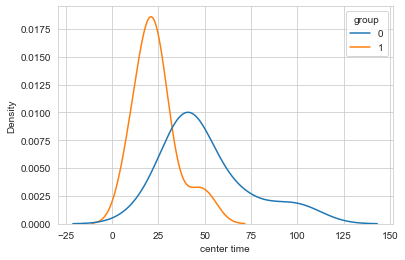

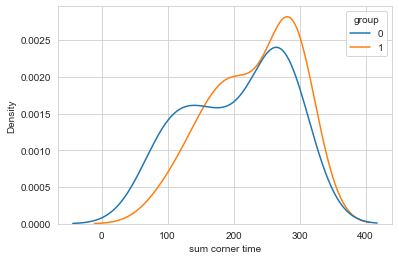

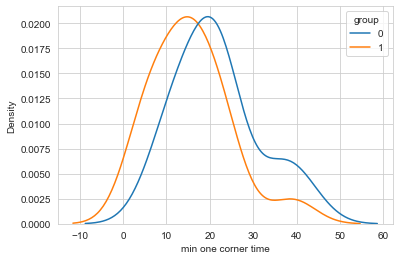

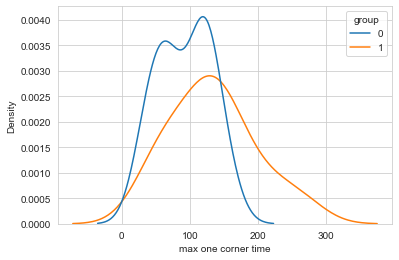

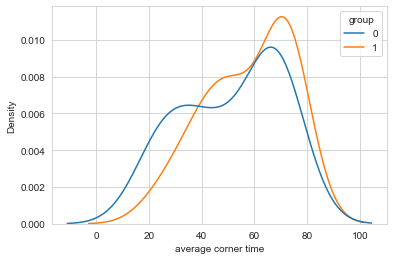

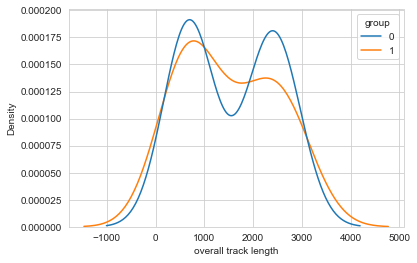

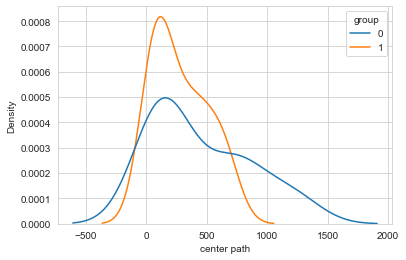

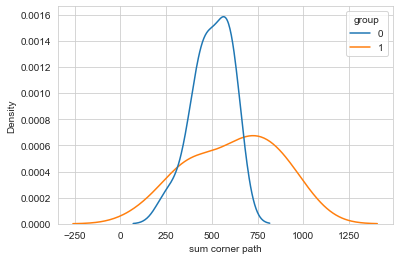

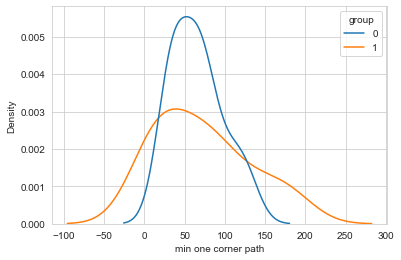

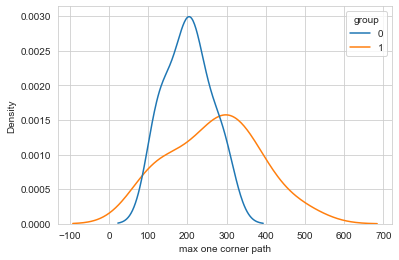

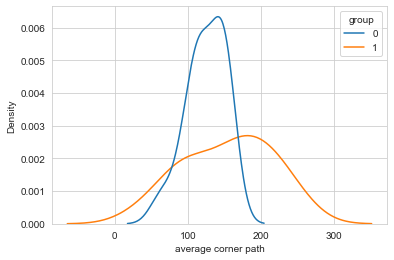

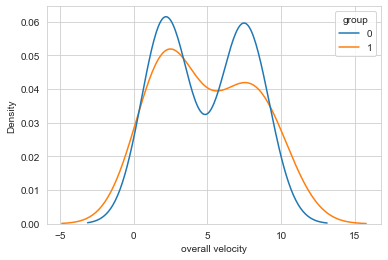

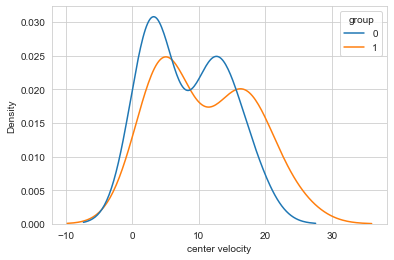

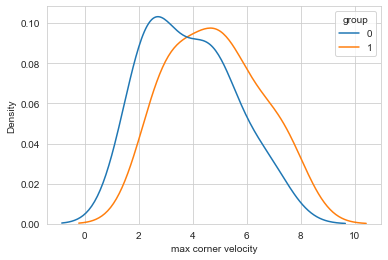

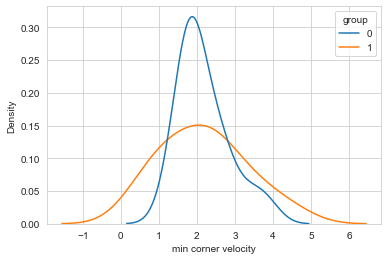

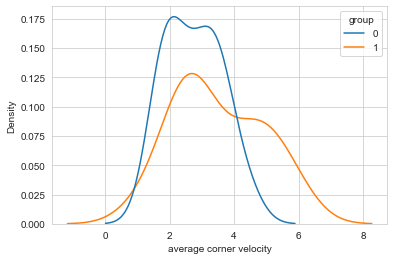

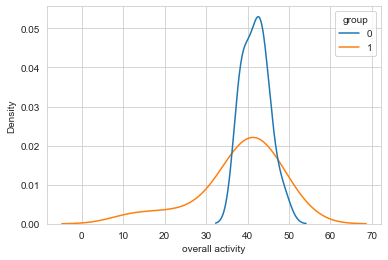

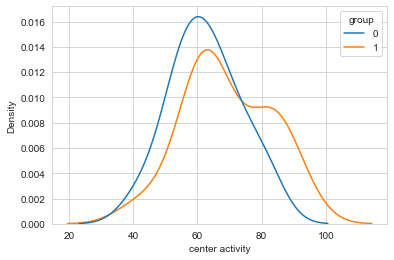

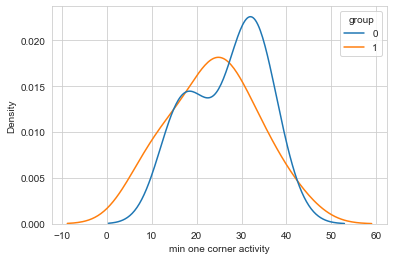

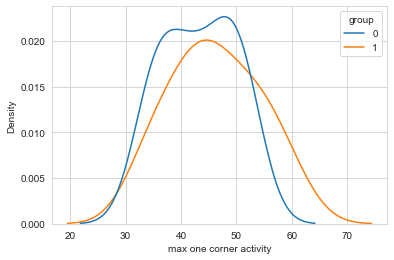

In [17]:
for col in data.columns[2:]:
    sns.kdeplot(x=col, hue='group', data =data)    
    plt.show()

In [28]:
rel_test = [(col, scipy.stats.ttest_rel(np.log1p(data[data.group==0][col]), np.log1p(data[data.group==1][col])).pvalue) for col in data.columns[2:]]

In [29]:
list(filter(lambda x: x[1] < 0.05, rel_test))

[('center time', 2.950305706039658e-06),
 ('sum corner time', 0.01531831165132513),
 ('max one corner time', 0.0011457652344975262),
 ('average corner time', 0.015293417190709872),
 ('center path', 0.01061198489804368),
 ('center velocity', 0.0017462339664769324),
 ('max corner velocity', 0.011244026624801949),
 ('average corner velocity', 0.024391358883878625),
 ('center activity', 0.0436072207955755)]